In [1]:
import data
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import DDPG
import numpy as np
from environments import RastriginEnv
from environments import QuadraticEnvND
from environments import RosenbrockEnv
from IPython.display import clear_output
import matplotlib.pyplot as plt
import testing

In [ ]:
PPO_Rastrigin_Function1 = PPO.load("/home/haoyu-li/learning-to-optimize/l2o/reward1_Rastrigin.zip")
PPO_Rastrigin_Function2 = PPO.load("/home/haoyu-li/learning-to-optimize/l2o/reward2_Rastrigin.zip")
PPO_Rastrigin_Function3 = PPO.load("/home/haoyu-li/learning-to-optimize/l2o/reward3_Rastrigin.zip")
PPO_Rastrigin_Function4 = PPO.load("/home/haoyu-li/learning-to-optimize/l2o/reward4_Rastrigin.zip")

/home/haoyu-li/.local/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() takes at most 16 arguments (18 given)
  warnings.warn(
/home/haoyu-li/.local/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() takes at most 16 arguments (18 given)
  warnings.warn(
/home/haoyu-li/.local/lib/python3.9/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` 

In [3]:
testing_functions = data.generate_dataset(n = 10, function_type = 'rastrigin_function', n_dims = 3)
env_rast = RastriginEnv(functions = testing_functions, n_dims = 2, max_steps = 200)
PPO_Rastrigin_Function1.set_env(env=env_rast)
PPO_Rastrigin_Function2.set_env(env=env_rast)
PPO_Rastrigin_Function3.set_env(env=env_rast)
PPO_Rastrigin_Function4.set_env(env=env_rast)

/home/haoyu-li/.local/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


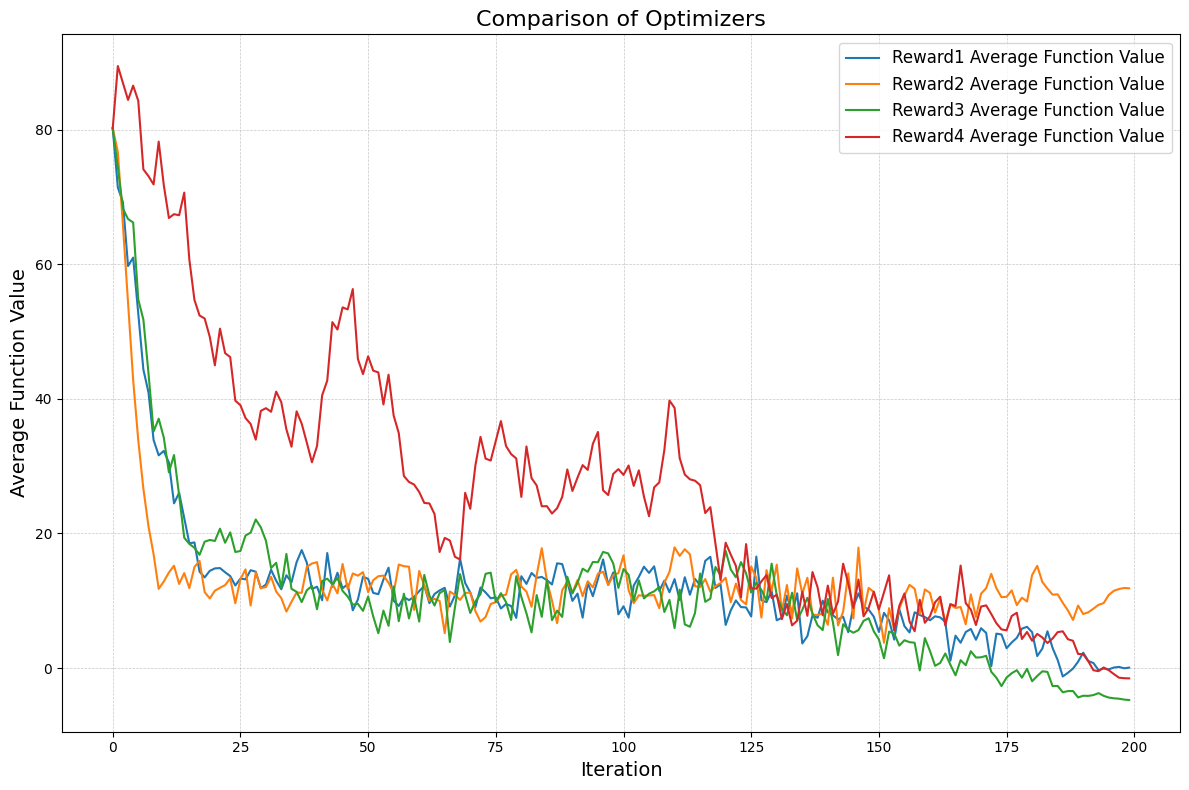

In [5]:
models = {
        'Reward1': PPO_Rastrigin_Function1,
        'Reward2': PPO_Rastrigin_Function2,
        'Reward3': PPO_Rastrigin_Function3,
        'Reward4': PPO_Rastrigin_Function4,
}
max_iterations = 200
results = testing.run_optimizer_tests(env_rast, testing_functions, models, max_iterations = 200, function_type = 'rastrigin_function')
avg_values = testing.calculate_average_values(results)
testing.plot_results(avg_values, max_iterations)